# Modele toutes variables sans filtre

Dans ce notebook, Nous allons construire un modèle prenant en compte l'ensemble des variables à la fois contextuelles et historiques, sur l'ensemble du dataset.


In [ ]:
# From the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py

#libraries
import feature_engineering
import visualization
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files
import sklearn
import missingno as msno
from pandas.plotting import scatter_matrix

--2023-07-04 11:35:56--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-07-04 11:35:56 (22.1 MB/s) - ‘feature_engineering.py’ saved [2206/2206]

--2023-07-04 11:35:56--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443.

In [ ]:
#dataset
!pip install GitPython
!git clone https://github.com/hrandrIAga/ChallengeData_SNCFTransilien.git
df = pd.read_csv('/content/ChallengeData_SNCFTransilien/NET4550_Haga&Pierre&Adam/Datasets/Datasets_new/train_t0sj.csv')
validation = pd.read_csv('/content/ChallengeData_SNCFTransilien/NET4550_Haga&Pierre&Adam/Datasets/Datasets_new/validation_t0sj.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
Cloning into 'ML_for_networks'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 249 (delta 97), reused 161 (delta 20), pack-reused 0
Receiving objects: 100% (249/249), 12.11 MiB | 3.94 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Updating files: 100% (70/70), done.


## I. Nouvelle etude de corrélation

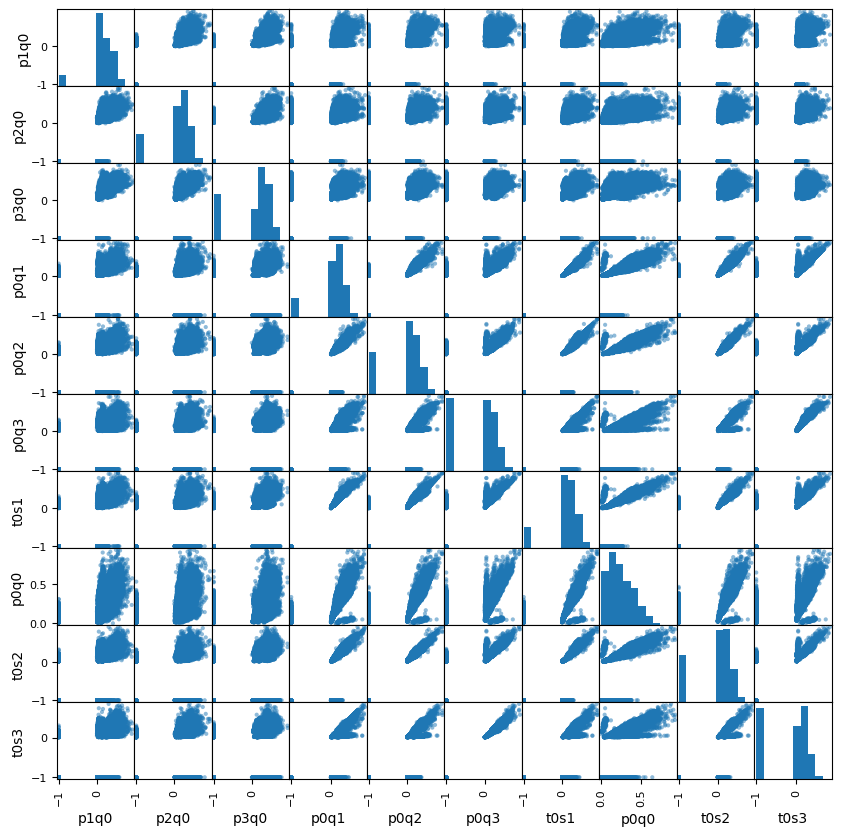

In [ ]:
# Let us just consider some features
columns_to_plot = [
                       'p1q0', 'p2q0',
                        'p3q0',
                        'p0q1', 'p0q2',
                       'p0q3', 't0s1', 'p0q0', 't0s2', 't0s3']
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))

plt.show()

In [ ]:
corrmatrix = df[columns_to_plot].corr()
corrmatrix

,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,t0s1,p0q0,t0s2,t0s3
p1q0,1.000000,0.716700,0.641422,0.294216,0.318934,0.307434,0.309770,0.518417,0.314746,0.304510
p2q0,0.716700,1.000000,0.823747,0.195350,0.215179,0.252407,0.211604,0.459362,0.211179,0.248788
p3q0,0.641422,0.823747,1.000000,0.202397,0.232606,0.263134,0.221811,0.492556,0.230038,0.256242
p0q1,0.294216,0.195350,0.202397,1.000000,0.757515,0.629668,0.993980,0.603496,0.759317,0.632530
p0q2,0.318934,0.215179,0.232606,0.757515,1.000000,0.800914,0.775868,0.644936,0.998408,0.802270
p0q3,0.307434,0.252407,0.263134,0.629668,0.800914,1.000000,0.654475,0.656469,0.806655,0.997643
t0s1,0.309770,0.211604,0.221811,0.993980,0.775868,0.654475,1.000000,0.642493,0.775286,0.651898
p0q0,0.518417,0.459362,0.492556,0.603496,0.644936,0.656469,0.642493,1.000000,0.639068,0.643636
t0s2,0.314746,0.211179,0.230038,0.759317,0.998408,0.806655,0.775286,0.639068,1.000000,0.806959
t0s3,0.304510,0.248788,0.256242,0.632530,0.802270,0.997643,0.651898,0.643636,0.806959,1.000000


On constate une forte corrélation entre les variables historiques.
Il est possible que supprimer une ou plusieurs d'entre elles permettent d'améliorer les performances des modèles

In [ ]:
import pprint
pprint.pprint(df.columns.to_list())

['Unnamed: 0.1',
 'Unnamed: 0',
 'date',
 'train',
 'station',
 'hour',
 'composition',
 'p1q0',
 'p2q0',
 'p3q0',
 'p0q1',
 'p0q2',
 'p0q3',
 'p0q0',
 'day',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station

## II. Modele 1 : Régression linéaire univariée

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import pickle # to serialize/deserialize objects

from statistics import mean


## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression

#train test split
#We now divide the dataframe in a training and a test dataframe. By default, the dataset is split randomly (which is good).

#We now divide the dataframe in a training and a test dataframe. By default, the dataset is split randomly (which is good).
X_train = df['t0s1'].values
y_train = df['p0q0'].values

X_test = validation['t0s1'].values
y_test = validation['p0q0'].values

--2023-07-04 11:37:03--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-07-04 11:37:03 (40.7 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2023-07-04 11:37:03--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

In [ ]:

Mmodel = AndreaLinearRegression()
Mmodel.fit(X_train, y_train, column_names=['p0q1'])
Mmodel.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:37:04   Log-Likelihood:                 17588.
No. Observations:               25160   AIC:                        -3.517e+04
Df Residuals:                   25158   BIC:                        -3.516e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2198      0.001    279.746      0.0

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = Mmodel.predict(X_test.reshape(-1, 1))
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.10084776893509813

## III. Modele 2 : Régression polynomiale multivariée

In [ ]:
cols_multi = [
 'p1q0',
 'p2q0',
 'p3q0',
 #'p0q0',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
 'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 't0s3',
 'val_p1q0',
 'val_p2q0',
 'val_p3q0',
 'val_t0s1',
 'val_t0s2',
 'val_t0s3']

In [ ]:

# the dataframe into an array
X_train_multi = df[cols_multi].values

y_train_multi = df['p0q0'].values


# Do the same for the test dataset
X_test = validation[cols_multi].values
y_test = validation['p0q0'].values

In [ ]:

Mmodel = AndreaLinearRegression()
Mmodel.fit(X_train_multi, y_train_multi, column_names=cols_multi)
Mmodel.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     5594.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:37:05   Log-Likelihood:                 51216.
No. Observations:               25160   AIC:                        -1.022e+05
Df Residuals:                   25053   BIC:                        -1.013e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.9071      0.006    154.918

Certains coefficient ne sont pas pertinent, probablement en raison des colinéarités entre les variables :
* On supprime les variables pour lesquelles le pvalue > .05
* on supprime val_t0s2, t0s2, val_t0s3 et t0s3 dont les coefficeint ont bizarrement une valeur négative (sûreùent à cause de la corrélation avec t0s1)
* de même pour p2q0 et val p2q0

In [ ]:
cols_multi2 = [
 'p1q0',
 #'p2q0',
 'p3q0',
 #'p0q0',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 #'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 #'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
# 'Train_20',
# 'Train_21',
 'Train_22',
 'Train_23',
# 'Train_24',
 'Train_25',
 'Train_26',
 #'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 #'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 #'Train_35',
 'Train_36',
 'Train_37',
 #'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 #'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
# 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
# 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
 'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
# 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 #'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
# 't0s2',
# 't0s3',
 'val_p1q0',
 #'val_p2q0',
 'val_p3q0',
 'val_t0s1',
 'val_t0s2',
 #'val_t0s3'
 ]

In [ ]:

# the dataframe into an array
X_train_multi2 = df[cols_multi2].values

y_train_multi2 = df['p0q0'].values


# Do the same for the test dataset
X_test2 = validation[cols_multi2].values
y_test2 = validation['p0q0'].values

In [ ]:

Mmodel2 = AndreaLinearRegression()
Mmodel2.fit(X_train_multi2, y_train_multi2, column_names=cols_multi2)
Mmodel2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     5661.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:37:06   Log-Likelihood:                 49249.
No. Observations:               25160   AIC:                        -9.832e+04
Df Residuals:                   25070   BIC:                        -9.759e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         1.0050      0.005    186.307

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred_multi = Mmodel2.predict(X_test2)
MAE_multi = mean_absolute_error(y_test2, y_pred_multi)
print('MAE',MAE_multi)

MAE 0.023539879124534303


Le modèle univarié est plus performant

## IV. Modèle 3 : Réseau de neurone

NB : nous n'avons pas standardiser les données car l'ordre de grandeur des variables est le même
* taux d'occupation : entre 0 et 1
* one hot encoding : entre 0 et 1
* heure = heure/24 --> entre 0 et 1

In [ ]:
cols_nn = [
 'p1q0',
 'p2q0',
 'p3q0',
 #'p0q0',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
 'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 't0s3',
 'val_p1q0',
 'val_p2q0',
 'val_p3q0',
 'val_t0s1',
 'val_t0s2',
 'val_t0s3']

Après plusieurs essais par tatonnemnt, voici le model de réseau de neurones ayant obtenu la meilleure performance sur les données de validation :

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# Séparation des données en ensembles d'entraînement et de test
X_train = df[cols_nn].values
y_train = df['p0q0'].values
X_test = validation[cols_nn].values
y_test = validation['p0q0'].values

# Définition de l'architecture du modèle de réseau de neurones
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_absolute_error')

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=83, batch_size=32, verbose=1, validation_data=(X_test, y_test))


In [ ]:
# Évaluation du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

197/197 [==============================] - 0s 1ms/step
MAE: 0.009342501278475718


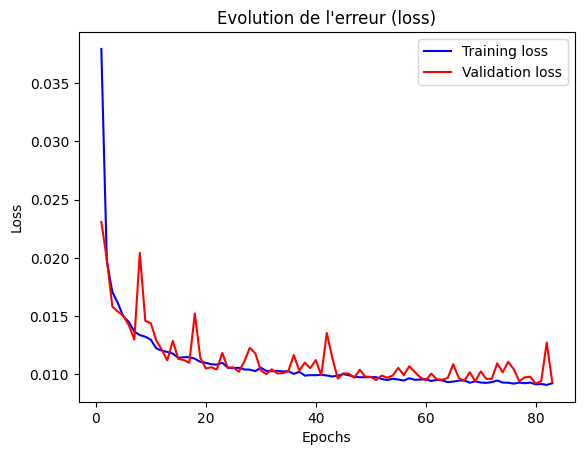

In [ ]:

import matplotlib.pyplot as plt

# Visualisation de l'évolution de l'erreur (loss) pour l'ensemble d'entraînement et l'ensemble de test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Evolution de l\'erreur (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## V. Modèle 4 : Random Forest

In [ ]:
cols_rf = [
 'p1q0',
 'p2q0',
 'p3q0',
 #'p0q0',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
 'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 't0s3',
 'val_p1q0',
 'val_p2q0',
 'val_p3q0',
 'val_t0s1',
 'val_t0s2',
 'val_t0s3']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

features = df[cols_rf]
target = df['p0q0']

# Séparation des données en ensembles d'entraînement et de test
X_train = df[cols_rf].values
y_train = df['p0q0'].values
X_test = validation[cols_rf].values
y_test = validation['p0q0'].values

param_grid = {
    'n_estimators': [500],
    'max_depth': [16,18],
    'min_samples_split': [5],
    'min_samples_leaf': [ 5,6,7]
}

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor( random_state=42)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print('Meilleurs hyperparamètres:', best_params)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = random_search.predict(X_test)

# Évaluation du modèle en utilisant l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE avec les meilleurs hyperparamètres:', mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 18}
MAE avec les meilleurs hyperparamètres: 0.010922112783406006


## Conclusion

On retiens que le modèle utilisant l'ensemble du dataset et des features est  plus performant que les modèles utilisant uniquement les variables contextuelles ou uniquement les variables historiques  
> En particulier, le réseau de neurone sur l'ensemble du dataset donne le meilleur MAE : 0.093